In [1]:
#import pandas
import pandas as pd
import seaborn as sns
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
from math import ceil
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN
from scipy.cluster.hierarchy import dendrogram
import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt
import libpysal
import warnings

## 01 Read in data and Clean

In [2]:
#read in os and pt data
df_original= pd.read_csv('data/clean/df_data_standardised.csv')

df_original.head()

,NAME,geometry,gcse_2013,ptal_2013,nature_access_2013,median_house_2014_log,pollution_2008,burglariesper1000residents
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",-0.8125,-1.806163,2.267964,-1.146443,-5.072976,-5.526405
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",-0.7500,-1.986779,-1.521546,-0.626254,-1.070445,-3.978898
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",-0.2500,-1.083698,-0.416272,-0.102444,-2.280512,-3.311815
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.7500,-2.167395,-0.818190,0.773093,-1.349691,-5.208398
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.7500,-2.167395,-0.818190,0.773093,-1.908184,-5.208398


In [3]:
df_original.describe()

,gcse_2013,ptal_2013,nature_access_2013,median_house_2014_log,pollution_2008,burglariesper1000residents
count,668.000000,668.000000,668.000000,668.000000,6.680000e+02,668.000000
mean,0.110591,0.654058,-0.013838,0.491040,9.097803e-01,0.193637
std,1.118187,2.506570,0.991342,3.347408,5.098455e+00,3.585308
min,-3.062500,-3.792942,-3.186633,-5.724865,-8.144687e+00,-7.488415
25%,-0.687500,-1.264314,-0.717710,-2.046288,-2.839005e+00,-2.504687
50%,0.000000,0.000000,0.000000,0.000000,8.243406e-15,0.000000
75%,0.812500,2.212549,0.674648,2.306660,3.955991e+00,2.467249
max,5.125000,8.308348,2.641174,17.249922,2.303783e+01,10.775271


In [4]:
df_original_standard = df_original[["gcse_2013", "ptal_2013", "nature_access_2013", "median_house_2014_log", "pollution_2008", "burglariesper1000residents"]]
df_original_standard.head()

,gcse_2013,ptal_2013,nature_access_2013,median_house_2014_log,pollution_2008,burglariesper1000residents
0,-0.8125,-1.806163,2.267964,-1.146443,-5.072976,-5.526405
1,-0.7500,-1.986779,-1.521546,-0.626254,-1.070445,-3.978898
2,-0.2500,-1.083698,-0.416272,-0.102444,-2.280512,-3.311815
3,0.7500,-2.167395,-0.818190,0.773093,-1.349691,-5.208398
4,0.7500,-2.167395,-0.818190,0.773093,-1.908184,-5.208398


## 02 Standardize the Data

In [5]:
#data standarlization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_original_standard)
df_original_standard_2=scaler.transform(df_original_standard)

In [6]:
df_original_standard_2


array([[0.27480916, 0.1641791 , 0.93596059, 0.1992803 , 0.09850746,
        0.10742683],
       [0.28244275, 0.14925373, 0.28571429, 0.22192202, 0.22686567,
        0.19215819],
       [0.34351145, 0.2238806 , 0.47536946, 0.24472135, 0.1880597 ,
        0.22868332],
       ...,
       [0.38931298, 0.14925373, 0.68965517, 0.10885356, 0.08955224,
        0.40045268],
       [0.23664122, 0.14925373, 0.59852217, 0.10954562, 0.13134328,
        0.79883294],
       [0.3129771 , 0.20895522, 0.50738916, 0.06916691, 0.17313433,
        0.48810277]])

In [7]:
#check the data after standarlization
a=pd.DataFrame(df_original_standard_2)
a.describe()


,0,1,2,3,4,5
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.387553,0.367481,0.544423,0.270553,0.290370,0.420619
std,0.136572,0.207132,0.170105,0.145699,0.163504,0.196308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290076,0.208955,0.423645,0.160114,0.170149,0.272876
50%,0.374046,0.313433,0.546798,0.249180,0.261194,0.410017
75%,0.473282,0.496269,0.662562,0.349580,0.388060,0.545107
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
new_cols = ["gcse_2013", "ptal_2013", "nature_access_2013", "median_house_2014_log", "pollution_2008", "burglariesper1000residents"]

a.columns = new_cols

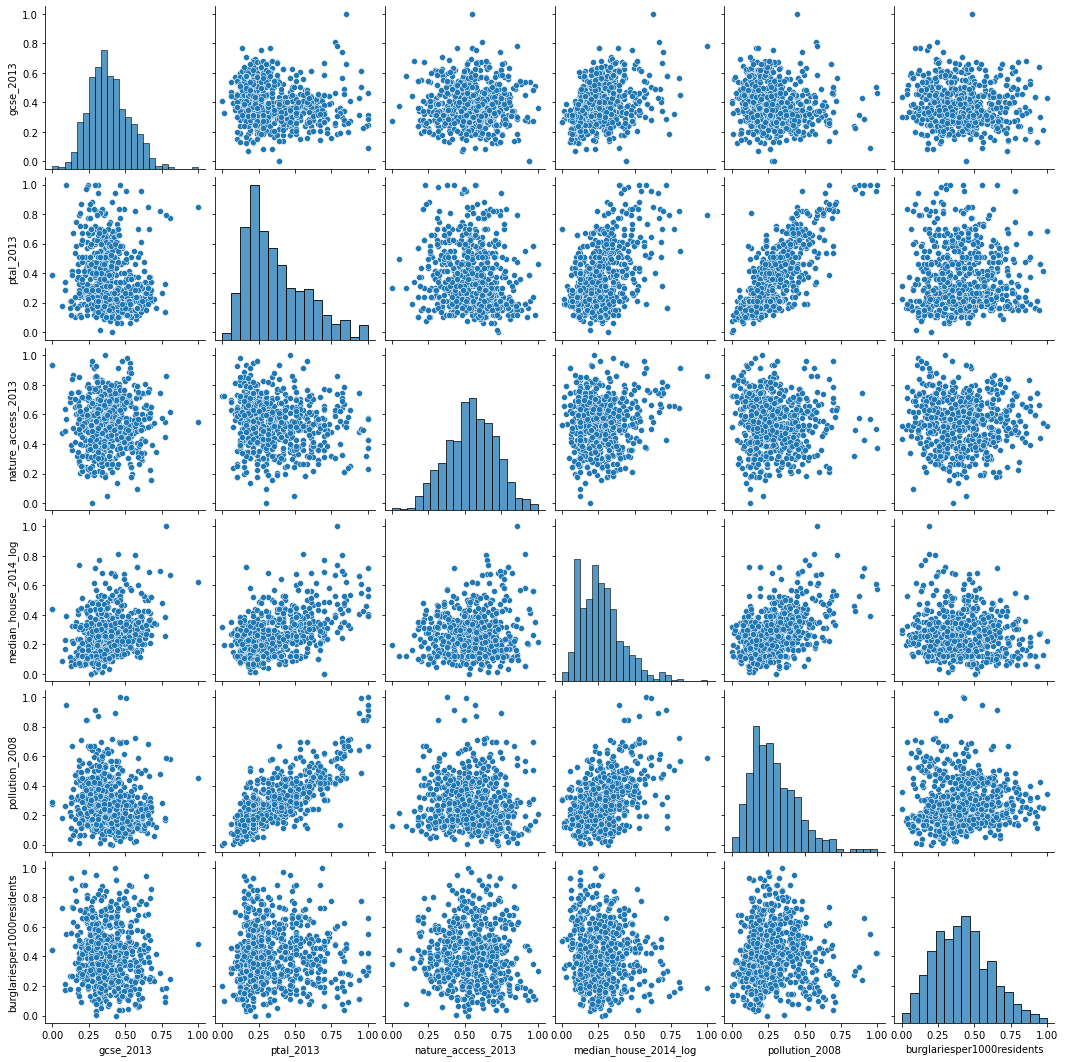

In [9]:
sns.pairplot(a)

In [10]:
a.head()

,gcse_2013,ptal_2013,nature_access_2013,median_house_2014_log,pollution_2008,burglariesper1000residents
0,0.274809,0.164179,0.935961,0.199280,0.098507,0.107427
1,0.282443,0.149254,0.285714,0.221922,0.226866,0.192158
2,0.343511,0.223881,0.475369,0.244721,0.188060,0.228683
3,0.465649,0.134328,0.406404,0.282830,0.217910,0.124839
4,0.465649,0.134328,0.406404,0.282830,0.200000,0.124839


In [11]:
df_original_wards = df_original[["NAME", "geometry"]]
df_original_wards.head()
#df_original_wards.info()

,NAME,geometry
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4..."
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5..."
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ..."
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ..."


In [12]:
#rejoin back 

df_original_standard_3 = df_original_wards.join(a)


df_original_standard_3

,NAME,geometry,gcse_2013,ptal_2013,nature_access_2013,median_house_2014_log,pollution_2008,burglariesper1000residents
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.935961,0.199280,0.098507,0.107427
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.285714,0.221922,0.226866,0.192158
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.475369,0.244721,0.188060,0.228683
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.406404,0.282830,0.217910,0.124839
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.406404,0.282830,0.200000,0.124839
...,...,...,...,...,...,...,...,...
663,Heath,"POLYGON ((549410.7 187450.7, 549437.7 187422.8...",0.297710,0.208955,0.559113,0.072275,0.143284,0.488322
664,Whalebone,"POLYGON ((547715.2 187914.2, 547845.4 187955.3...",0.358779,0.238806,0.174877,0.101853,0.188060,0.646085
665,Eastbrook,"POLYGON ((549991.5 184928.5, 549988.9 184978.8...",0.389313,0.149254,0.689655,0.108854,0.089552,0.400453
666,Chadwell Heath,"POLYGON ((547715.2 187914.2, 547712.5 187919.1...",0.236641,0.149254,0.598522,0.109546,0.131343,0.798833


## 03 Set up Profiles

In [13]:
profile_1_student = df_original_standard_3[["gcse_2013", "ptal_2013",  "median_house_2014_log"]]
profile_1_student.head()

,gcse_2013,ptal_2013,median_house_2014_log
0,0.274809,0.164179,0.199280
1,0.282443,0.149254,0.221922
2,0.343511,0.223881,0.244721
3,0.465649,0.134328,0.282830
4,0.465649,0.134328,0.282830


In [14]:
profile_2_youngfam = df_original_standard_3[["gcse_2013", "pollution_2008", "burglariesper1000residents"]]
profile_2_youngfam.head()

,gcse_2013,pollution_2008,burglariesper1000residents
0,0.274809,0.098507,0.107427
1,0.282443,0.226866,0.192158
2,0.343511,0.188060,0.228683
3,0.465649,0.217910,0.124839
4,0.465649,0.200000,0.124839


In [15]:
profile_3_olderfam = df_original_standard_3[["gcse_2013", "ptal_2013", "burglariesper1000residents"]]
profile_3_olderfam.head()

,gcse_2013,ptal_2013,burglariesper1000residents
0,0.274809,0.164179,0.107427
1,0.282443,0.149254,0.192158
2,0.343511,0.223881,0.228683
3,0.465649,0.134328,0.124839
4,0.465649,0.134328,0.124839


In [16]:
profile_4_profcouple = df_original_standard_3[["gcse_2013", "ptal_2013", "nature_access_2013"]]
profile_4_profcouple.head()

,gcse_2013,ptal_2013,nature_access_2013
0,0.274809,0.164179,0.935961
1,0.282443,0.149254,0.285714
2,0.343511,0.223881,0.475369
3,0.465649,0.134328,0.406404
4,0.465649,0.134328,0.406404


In [17]:
profile_5_single_income = df_original_standard_3[[ "ptal_2013", "nature_access_2013", "median_house_2014_log"]]
profile_5_single_income.head()

,ptal_2013,nature_access_2013,median_house_2014_log
0,0.164179,0.935961,0.199280
1,0.149254,0.285714,0.221922
2,0.223881,0.475369,0.244721
3,0.134328,0.406404,0.282830
4,0.134328,0.406404,0.282830


In [18]:
profile_6_retirees = df_original_standard_3[["ptal_2013", "nature_access_2013", "pollution_2008"]]
profile_6_retirees.head()

,ptal_2013,nature_access_2013,pollution_2008
0,0.164179,0.935961,0.098507
1,0.149254,0.285714,0.226866
2,0.223881,0.475369,0.188060
3,0.134328,0.406404,0.217910
4,0.134328,0.406404,0.200000


## 04 Begin Clustering

In [19]:
#set the function
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, leaf_rotation=90., **kwargs)
    
    
def mapping_clusters(labels_cluster):
    ppd['cluster_nm'] = labels_cluster
    ppd.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

### Profile 1

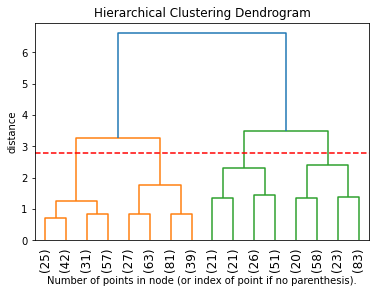

In [20]:
#Profile 1 Cluster

agg_cluster = AgglomerativeClustering(linkage="ward",distance_threshold= 0, n_clusters=None).fit(profile_1_student)
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
#plt.hlines(3.5, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.hlines(2.8, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.show()

#conclusion:4 

In [21]:
agg_cluster = AgglomerativeClustering(linkage="ward", distance_threshold = 2.8, n_clusters=None)
agg_cluster.fit(profile_1_student)
profile_1_student["no_of_cluster_p1"] = agg_cluster.labels_

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [22]:
profile_1_student

,gcse_2013,ptal_2013,median_house_2014_log,no_of_cluster_p1
0,0.274809,0.164179,0.199280,3
1,0.282443,0.149254,0.221922,3
2,0.343511,0.223881,0.244721,3
3,0.465649,0.134328,0.282830,1
4,0.465649,0.134328,0.282830,1
...,...,...,...,...
663,0.297710,0.208955,0.072275,3
664,0.358779,0.238806,0.101853,3
665,0.389313,0.149254,0.108854,1
666,0.236641,0.149254,0.109546,3


/tmp/ipykernel_4742/1069937507.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters with distance threshold 2.8')

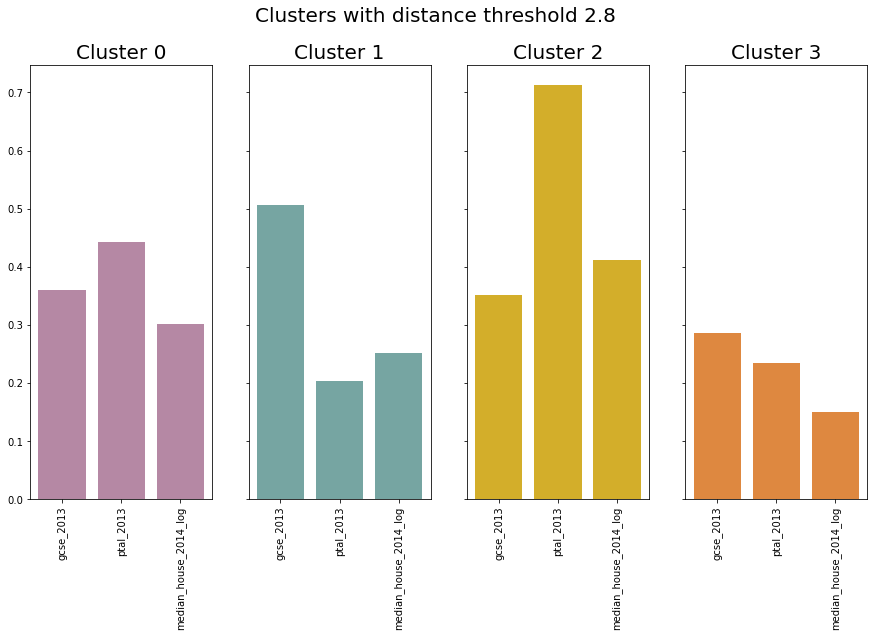

In [23]:
agglom_means =profile_1_student.groupby("no_of_cluster_p1").mean()
agglom_means_T = agglom_means.T.round(4)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T.reset_index(inplace=True)
colors = ['#B588A4','#76A5A2','#D3AE2A','#DE8840']
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
plt.suptitle("Clusters with distance threshold 2.8", fontsize = 20)

In [24]:
#lets map you

#join profile_1_student to orig dataset


profile_1_student_link = df_original_standard_3[["NAME","geometry","gcse_2013", "ptal_2013",  "median_house_2014_log"]]
profile_1_student_link.head()

profile_1_student_link.rename(columns = {'gcse_2013': 'Opportunity_p1', 'ptal_2013': 'Transport_p1','median_house_2014_log' : 'Median_House_p1'}, inplace = True)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
profile_1_student_link

,NAME,geometry,Opportunity_p1,Transport_p1,Median_House_p1
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.199280
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.221922
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.244721
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830
...,...,...,...,...,...
663,Heath,"POLYGON ((549410.7 187450.7, 549437.7 187422.8...",0.297710,0.208955,0.072275
664,Whalebone,"POLYGON ((547715.2 187914.2, 547845.4 187955.3...",0.358779,0.238806,0.101853
665,Eastbrook,"POLYGON ((549991.5 184928.5, 549988.9 184978.8...",0.389313,0.149254,0.108854
666,Chadwell Heath,"POLYGON ((547715.2 187914.2, 547712.5 187919.1...",0.236641,0.149254,0.109546


In [26]:
#rejoin back 

profile_1_student_Mapping= profile_1_student_link.join(profile_1_student)
profile_1_student_Mapping.head(15)
profile_1_student_Mapping.drop(['geometry'], axis =1)


,NAME,Opportunity_p1,Transport_p1,Median_House_p1,gcse_2013,ptal_2013,median_house_2014_log,no_of_cluster_p1
0,Chessington South,0.274809,0.164179,0.199280,0.274809,0.164179,0.199280,3
1,Tolworth and Hook Rise,0.282443,0.149254,0.221922,0.282443,0.149254,0.221922,3
2,Berrylands,0.343511,0.223881,0.244721,0.343511,0.223881,0.244721,3
3,Alexandra,0.465649,0.134328,0.282830,0.465649,0.134328,0.282830,1
4,Alexandra,0.465649,0.134328,0.282830,0.465649,0.134328,0.282830,1
...,...,...,...,...,...,...,...,...
663,Heath,0.297710,0.208955,0.072275,0.297710,0.208955,0.072275,3
664,Whalebone,0.358779,0.238806,0.101853,0.358779,0.238806,0.101853,3
665,Eastbrook,0.389313,0.149254,0.108854,0.389313,0.149254,0.108854,1
666,Chadwell Heath,0.236641,0.149254,0.109546,0.236641,0.149254,0.109546,3


In [27]:
#profile_1_student_Mapping.plot(column='no_of_cluster_p1', legend=True, figsize=(8,8))

#### Plot

In [28]:
import geopandas as gpd
shapefile = gpd.read_file("data/gpkg/London_Ward.shp")
#print(shapefile)

<AxesSubplot:>

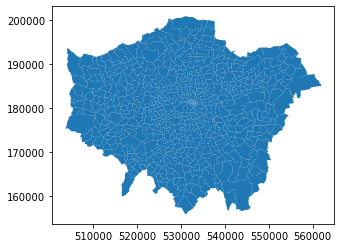

In [29]:
shapefile.plot()

In [30]:
shapefile.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


In [31]:
# left join in python
 
cluster_mapping_shape_file = pd.merge(shapefile, profile_1_student_Mapping,
                 left_on = 'NAME',
                 right_on = 'NAME',
                        how = 'left')

print(cluster_mapping_shape_file.shape)
print(type(cluster_mapping_shape_file))

(787, 16)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [32]:
cluster_mapping_shape_file.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry_x,geometry_y,Opportunity_p1,Transport_p1,Median_House_p1,gcse_2013,ptal_2013,median_house_2014_log,no_of_cluster_p1
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...","POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.199280,0.274809,0.164179,0.199280,3.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...","POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.221922,0.282443,0.149254,0.221922,3.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...","POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.244721,0.343511,0.223881,0.244721,3.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830,0.465649,0.134328,0.282830,1.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830,0.465649,0.134328,0.282830,1.0


In [33]:
#cluster_mapping_shape_file.drop(columns=['geometry_y'], inplace= True)
cluster_mapping_shape_file.head()


,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry_x,geometry_y,Opportunity_p1,Transport_p1,Median_House_p1,gcse_2013,ptal_2013,median_house_2014_log,no_of_cluster_p1
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...","POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.199280,0.274809,0.164179,0.199280,3.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...","POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.221922,0.282443,0.149254,0.221922,3.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...","POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.244721,0.343511,0.223881,0.244721,3.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830,0.465649,0.134328,0.282830,1.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830,0.465649,0.134328,0.282830,1.0


In [34]:
#select nan values
cluster_mapping_shape_file[cluster_mapping_shape_file.geometry_x.isna()]

#drop
cluster_mapping_shape_file.drop(cluster_mapping_shape_file[cluster_mapping_shape_file.geometry_x.isna()].index.values, axis=0, inplace=True)

#we can see 24 nan values inside city of london.we will drop 

In [35]:
#rename geom x to geom
cluster_mapping_shape_file.rename(columns = {'geometry_x': 'geometry'}, inplace = True)



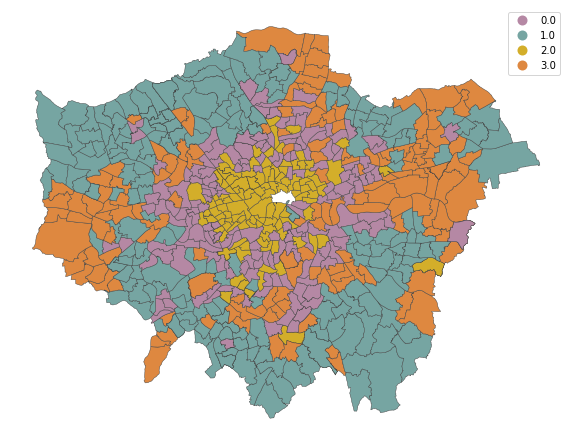

In [36]:
##f6dfb5','#ab6e73','#d5c2c8','#eca98f'
#'#F9A053','#5598C6','#DF5C5D','#66B866'


from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#B588A4','#76A5A2','#D3AE2A','#DE8840'], name='allred')
#GeoSeries(bldgs).plot(cmap=cmap)

#'Pastel1', 'Pastel2', 'Paired', 'Accent'

fig, ax = plt.subplots(figsize = (10,10))
cluster_mapping_shape_file.plot(column = "no_of_cluster_p1",edgecolor = '#444545',linewidth =0.45, cmap=cmap,categorical = True, legend=True, ax=ax)
ax.set_axis_off()



In [37]:
# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

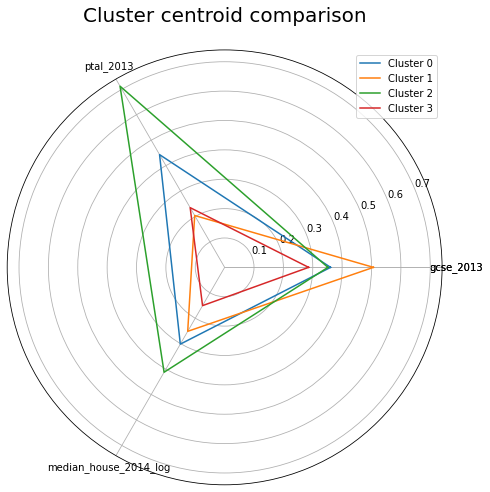

In [38]:
radar_plot_cluster_centroids(agglom_means)



### Profile 2

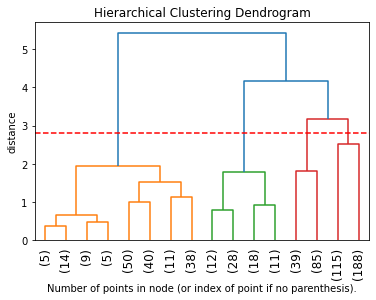

In [39]:
#Profile 2 Cluster

agg_cluster = AgglomerativeClustering(linkage="ward",distance_threshold= 0, n_clusters=None).fit(profile_2_youngfam)
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
#plt.hlines(3.5, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.hlines(2.8, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.show()

#conclusion:4 

In [40]:
agg_cluster = AgglomerativeClustering(linkage="ward", distance_threshold = 2.8, n_clusters=None)
agg_cluster.fit(profile_2_youngfam)
profile_2_youngfam["no_of_cluster_p2"] = agg_cluster.labels_

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [41]:
profile_2_youngfam

,gcse_2013,pollution_2008,burglariesper1000residents,no_of_cluster_p2
0,0.274809,0.098507,0.107427,3
1,0.282443,0.226866,0.192158,0
2,0.343511,0.188060,0.228683,3
3,0.465649,0.217910,0.124839,3
4,0.465649,0.200000,0.124839,3
...,...,...,...,...
663,0.297710,0.143284,0.488322,0
664,0.358779,0.188060,0.646085,1
665,0.389313,0.089552,0.400453,0
666,0.236641,0.131343,0.798833,1


/tmp/ipykernel_4742/342580430.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters with distance threshold 2.8')

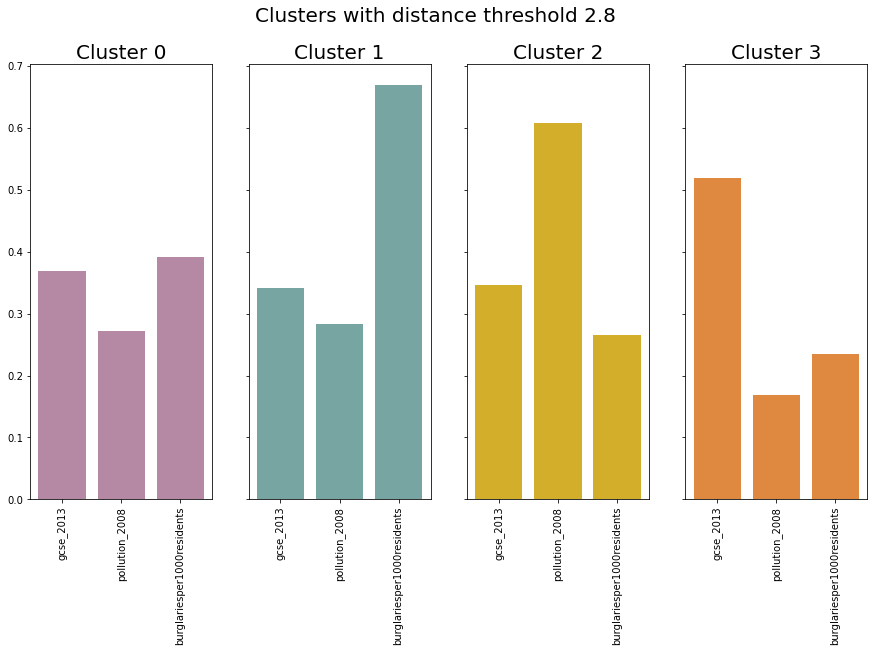

In [138]:
agglom_means =profile_2_youngfam.groupby("no_of_cluster_p2").mean()
agglom_means_T = agglom_means.T.round(4)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T.reset_index(inplace=True)
colors = ['#B588A4','#76A5A2','#D3AE2A','#DE8840']
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
plt.suptitle("Clusters with distance threshold 2.8", fontsize = 20)

In [43]:
#lets map you

#join profile_1_student to orig dataset


profile_2_youngfam_link = df_original_standard_3[["NAME","geometry","gcse_2013", "pollution_2008", "burglariesper1000residents"]]
profile_2_youngfam_link.head()

profile_2_youngfam_link.rename(columns = {'gcse_2013': 'Opportunity_p2', 'pollution_2008': 'Health/Environment_p2','burglariesper1000residents' : 'Safety_p2'}, inplace = True)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [44]:
profile_2_youngfam_link

,NAME,geometry,Opportunity_p2,Health/Environment_p2,Safety_p2
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.098507,0.107427
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.226866,0.192158
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.188060,0.228683
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.217910,0.124839
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.200000,0.124839
...,...,...,...,...,...
663,Heath,"POLYGON ((549410.7 187450.7, 549437.7 187422.8...",0.297710,0.143284,0.488322
664,Whalebone,"POLYGON ((547715.2 187914.2, 547845.4 187955.3...",0.358779,0.188060,0.646085
665,Eastbrook,"POLYGON ((549991.5 184928.5, 549988.9 184978.8...",0.389313,0.089552,0.400453
666,Chadwell Heath,"POLYGON ((547715.2 187914.2, 547712.5 187919.1...",0.236641,0.131343,0.798833


In [45]:
#rejoin back 

profile_2_youngfam_Mapping= profile_2_youngfam_link.join(profile_2_youngfam)
profile_2_youngfam_Mapping.head(15)
profile_2_youngfam_Mapping.drop(['geometry'], axis =1)

,NAME,Opportunity_p2,Health/Environment_p2,Safety_p2,gcse_2013,pollution_2008,burglariesper1000residents,no_of_cluster_p2
0,Chessington South,0.274809,0.098507,0.107427,0.274809,0.098507,0.107427,3
1,Tolworth and Hook Rise,0.282443,0.226866,0.192158,0.282443,0.226866,0.192158,0
2,Berrylands,0.343511,0.188060,0.228683,0.343511,0.188060,0.228683,3
3,Alexandra,0.465649,0.217910,0.124839,0.465649,0.217910,0.124839,3
4,Alexandra,0.465649,0.200000,0.124839,0.465649,0.200000,0.124839,3
...,...,...,...,...,...,...,...,...
663,Heath,0.297710,0.143284,0.488322,0.297710,0.143284,0.488322,0
664,Whalebone,0.358779,0.188060,0.646085,0.358779,0.188060,0.646085,1
665,Eastbrook,0.389313,0.089552,0.400453,0.389313,0.089552,0.400453,0
666,Chadwell Heath,0.236641,0.131343,0.798833,0.236641,0.131343,0.798833,1


#### Plot

In [46]:
# left join in python
 
cluster_mapping_shape_file_2 = pd.merge(shapefile, profile_2_youngfam_Mapping,
                 left_on = 'NAME',
                 right_on = 'NAME',
                        how = 'left')

print(cluster_mapping_shape_file_2.shape)
print(type(cluster_mapping_shape_file_2))

(787, 16)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [47]:
cluster_mapping_shape_file_2.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry_x,geometry_y,Opportunity_p2,Health/Environment_p2,Safety_p2,gcse_2013,pollution_2008,burglariesper1000residents,no_of_cluster_p2
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...","POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.098507,0.107427,0.274809,0.098507,0.107427,3.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...","POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.226866,0.192158,0.282443,0.226866,0.192158,0.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...","POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.188060,0.228683,0.343511,0.188060,0.228683,3.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.217910,0.124839,0.465649,0.217910,0.124839,3.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.200000,0.124839,0.465649,0.200000,0.124839,3.0


In [48]:
cluster_mapping_shape_file_2.drop(columns=['geometry_y'], inplace= True)
cluster_mapping_shape_file_2.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry_x,Opportunity_p2,Health/Environment_p2,Safety_p2,gcse_2013,pollution_2008,burglariesper1000residents,no_of_cluster_p2
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.274809,0.098507,0.107427,0.274809,0.098507,0.107427,3.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...",0.282443,0.226866,0.192158,0.282443,0.226866,0.192158,0.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...",0.343511,0.188060,0.228683,0.343511,0.188060,0.228683,3.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",0.465649,0.217910,0.124839,0.465649,0.217910,0.124839,3.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",0.465649,0.200000,0.124839,0.465649,0.200000,0.124839,3.0


In [49]:
#select nan values
cluster_mapping_shape_file_2[cluster_mapping_shape_file_2.geometry_x.isna()]

#drop
cluster_mapping_shape_file_2.drop(cluster_mapping_shape_file_2[cluster_mapping_shape_file_2.geometry_x.isna()].index.values, axis=0, inplace=True)

#we can see 24 nan values inside city of london.we will drop 

In [50]:
#rename geom x to geom
cluster_mapping_shape_file_2.rename(columns = {'geometry_x': 'geometry'}, inplace = True)


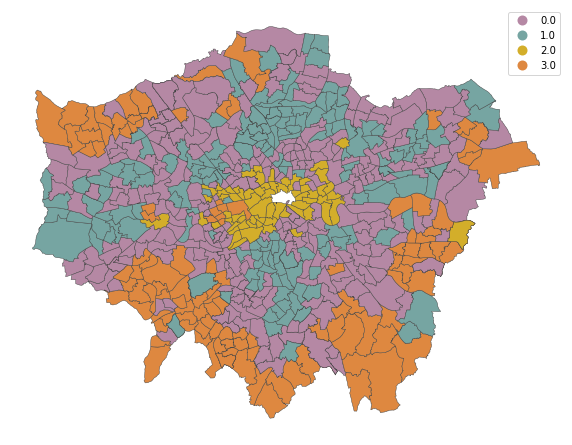

In [143]:

cmap = ListedColormap(['#B588A4','#76A5A2','#D3AE2A','#DE8840'], name='allred')
#GeoSeries(bldgs).plot(cmap=cmap)

#'Pastel1', 'Pastel2', 'Paired', 'Accent'

fig, ax = plt.subplots(figsize = (10,10))
cluster_mapping_shape_file_2.plot(column = "no_of_cluster_p2",edgecolor = '#444545',linewidth =0.45, cmap=cmap,categorical = True, legend=True, ax=ax)
ax.set_axis_off()



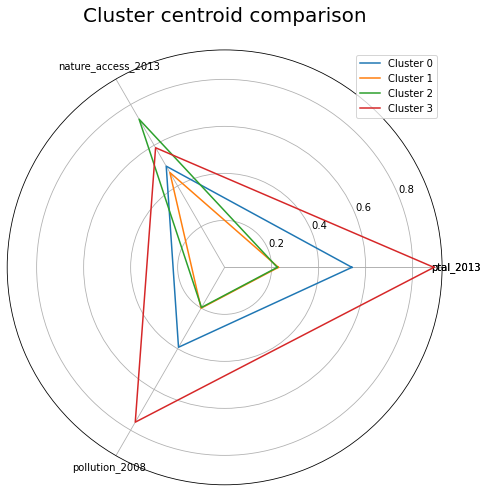

In [148]:
radar_plot_cluster_centroids(agglom_means)


### Profile 3


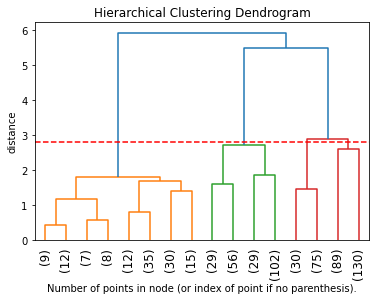

In [52]:
agg_cluster = AgglomerativeClustering(linkage="ward",distance_threshold= 0, n_clusters=None).fit(profile_3_olderfam)
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
#plt.hlines(3.5, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.hlines(2.8, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.show()

#conclusion:4 

In [53]:
agg_cluster = AgglomerativeClustering(linkage="ward", distance_threshold = 2.8, n_clusters=None)
agg_cluster.fit(profile_3_olderfam)
profile_3_olderfam["no_of_cluster_p3"] = agg_cluster.labels_

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [54]:
profile_3_olderfam

,gcse_2013,ptal_2013,burglariesper1000residents,no_of_cluster_p3
0,0.274809,0.164179,0.107427,3
1,0.282443,0.149254,0.192158,3
2,0.343511,0.223881,0.228683,3
3,0.465649,0.134328,0.124839,2
4,0.465649,0.134328,0.124839,2
...,...,...,...,...
663,0.297710,0.208955,0.488322,2
664,0.358779,0.238806,0.646085,0
665,0.389313,0.149254,0.400453,2
666,0.236641,0.149254,0.798833,0


/tmp/ipykernel_4742/3004256802.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters with distance threshold 2.8')

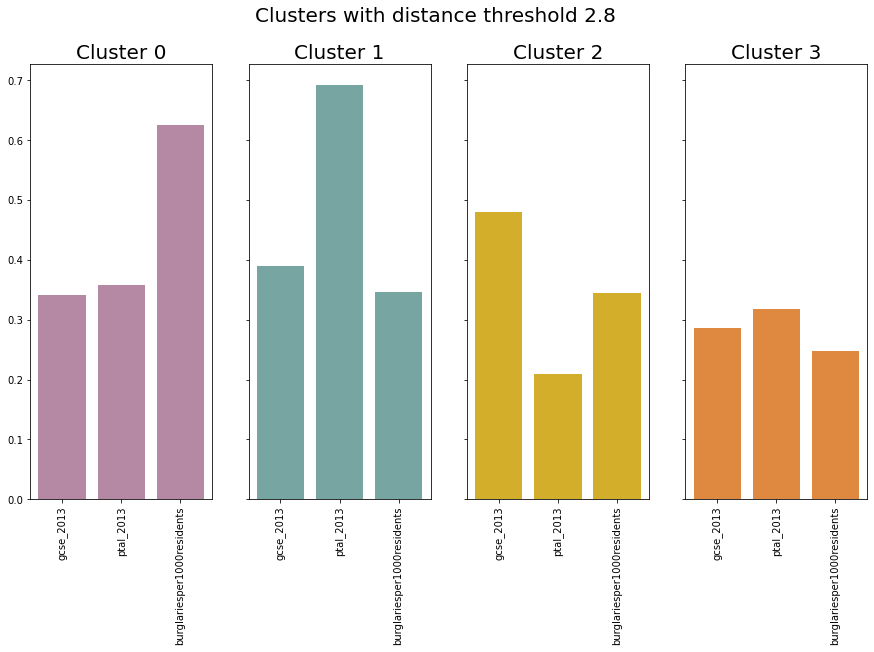

In [139]:
agglom_means =profile_3_olderfam.groupby("no_of_cluster_p3").mean()
agglom_means_T = agglom_means.T.round(4)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T.reset_index(inplace=True)
colors = ['#B588A4','#76A5A2','#D3AE2A','#DE8840']
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
plt.suptitle("Clusters with distance threshold 2.8", fontsize = 20)

In [56]:
#lets map you

#join profile_1_student to orig dataset


profile_3_olderfam_link = df_original_standard_3[["NAME","geometry","gcse_2013", "ptal_2013",  "burglariesper1000residents"]]
profile_3_olderfam_link.head()

profile_3_olderfam_link.rename(columns = {'gcse_2013': 'Opportunity_p3', 'ptal_2013': 'Transport_p3','burglariesper1000residents' : 'Safety_p3'}, inplace = True)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [57]:
profile_3_olderfam_link

,NAME,geometry,Opportunity_p3,Transport_p3,Safety_p3
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.107427
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.192158
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.228683
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.124839
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.124839
...,...,...,...,...,...
663,Heath,"POLYGON ((549410.7 187450.7, 549437.7 187422.8...",0.297710,0.208955,0.488322
664,Whalebone,"POLYGON ((547715.2 187914.2, 547845.4 187955.3...",0.358779,0.238806,0.646085
665,Eastbrook,"POLYGON ((549991.5 184928.5, 549988.9 184978.8...",0.389313,0.149254,0.400453
666,Chadwell Heath,"POLYGON ((547715.2 187914.2, 547712.5 187919.1...",0.236641,0.149254,0.798833


In [58]:
profile_3_olderfam_Mapping= profile_3_olderfam_link.join(profile_3_olderfam)
profile_3_olderfam_Mapping.head(15)
profile_3_olderfam_Mapping.drop(['geometry'], axis =1)


,NAME,Opportunity_p3,Transport_p3,Safety_p3,gcse_2013,ptal_2013,burglariesper1000residents,no_of_cluster_p3
0,Chessington South,0.274809,0.164179,0.107427,0.274809,0.164179,0.107427,3
1,Tolworth and Hook Rise,0.282443,0.149254,0.192158,0.282443,0.149254,0.192158,3
2,Berrylands,0.343511,0.223881,0.228683,0.343511,0.223881,0.228683,3
3,Alexandra,0.465649,0.134328,0.124839,0.465649,0.134328,0.124839,2
4,Alexandra,0.465649,0.134328,0.124839,0.465649,0.134328,0.124839,2
...,...,...,...,...,...,...,...,...
663,Heath,0.297710,0.208955,0.488322,0.297710,0.208955,0.488322,2
664,Whalebone,0.358779,0.238806,0.646085,0.358779,0.238806,0.646085,0
665,Eastbrook,0.389313,0.149254,0.400453,0.389313,0.149254,0.400453,2
666,Chadwell Heath,0.236641,0.149254,0.798833,0.236641,0.149254,0.798833,0


### plot

In [59]:
# left join in python
 
cluster_mapping_shape_file_3 = pd.merge(shapefile, profile_3_olderfam_Mapping,
                 left_on = 'NAME',
                 right_on = 'NAME',
                        how = 'left')

print(cluster_mapping_shape_file_3.shape)
print(type(cluster_mapping_shape_file_3))

(787, 16)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [60]:
cluster_mapping_shape_file_3.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry_x,geometry_y,Opportunity_p3,Transport_p3,Safety_p3,gcse_2013,ptal_2013,burglariesper1000residents,no_of_cluster_p3
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...","POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.107427,0.274809,0.164179,0.107427,3.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...","POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.192158,0.282443,0.149254,0.192158,3.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...","POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.228683,0.343511,0.223881,0.228683,3.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.124839,0.465649,0.134328,0.124839,2.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.124839,0.465649,0.134328,0.124839,2.0


In [61]:
#select nan values
cluster_mapping_shape_file_3[cluster_mapping_shape_file_3.geometry_x.isna()]

#drop
cluster_mapping_shape_file_3.drop(cluster_mapping_shape_file_3[cluster_mapping_shape_file_3.geometry_x.isna()].index.values, axis=0, inplace=True)

#we can see 24 nan values inside city of london.we will drop 

In [62]:
#rename geom x to geom
cluster_mapping_shape_file_3.rename(columns = {'geometry_x': 'geometry'}, inplace = True)


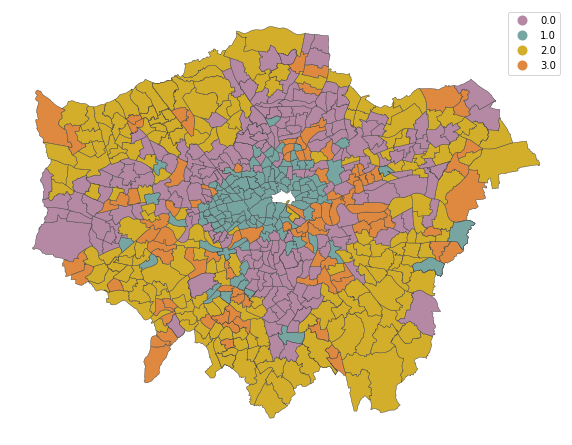

In [144]:

cmap = ListedColormap(['#B588A4','#76A5A2','#D3AE2A','#DE8840'], name='allred')
#GeoSeries(bldgs).plot(cmap=cmap)

#'Pastel1', 'Pastel2', 'Paired', 'Accent'

fig, ax = plt.subplots(figsize = (10,10))
cluster_mapping_shape_file_3.plot(column = "no_of_cluster_p3",edgecolor = '#444545',linewidth =0.45, cmap=cmap,categorical = True, legend=True, ax=ax)
ax.set_axis_off()

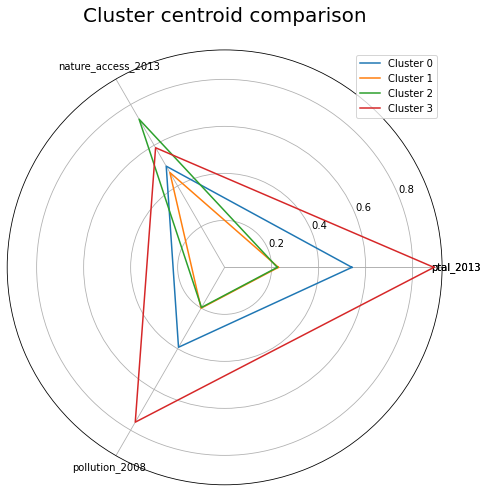

In [149]:
radar_plot_cluster_centroids(agglom_means)


### Profile 4

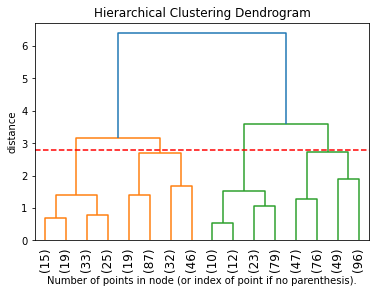

In [64]:
#Profile 4 Cluster

agg_cluster = AgglomerativeClustering(linkage="ward",distance_threshold= 0, n_clusters=None).fit(profile_4_profcouple)
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
#plt.hlines(3.5, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.hlines(2.8, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.show()

#conclusion:4 

In [65]:
agg_cluster = AgglomerativeClustering(linkage="ward", distance_threshold = 2.8, n_clusters=None)
agg_cluster.fit(profile_4_profcouple)
profile_4_profcouple["no_of_cluster_p4"] = agg_cluster.labels_

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [66]:
profile_4_profcouple

,gcse_2013,ptal_2013,nature_access_2013,no_of_cluster_p4
0,0.274809,0.164179,0.935961,0
1,0.282443,0.149254,0.285714,0
2,0.343511,0.223881,0.475369,0
3,0.465649,0.134328,0.406404,2
4,0.465649,0.134328,0.406404,2
...,...,...,...,...
663,0.297710,0.208955,0.559113,0
664,0.358779,0.238806,0.174877,2
665,0.389313,0.149254,0.689655,0
666,0.236641,0.149254,0.598522,0


/tmp/ipykernel_4742/2496008243.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters with distance threshold 2.8')

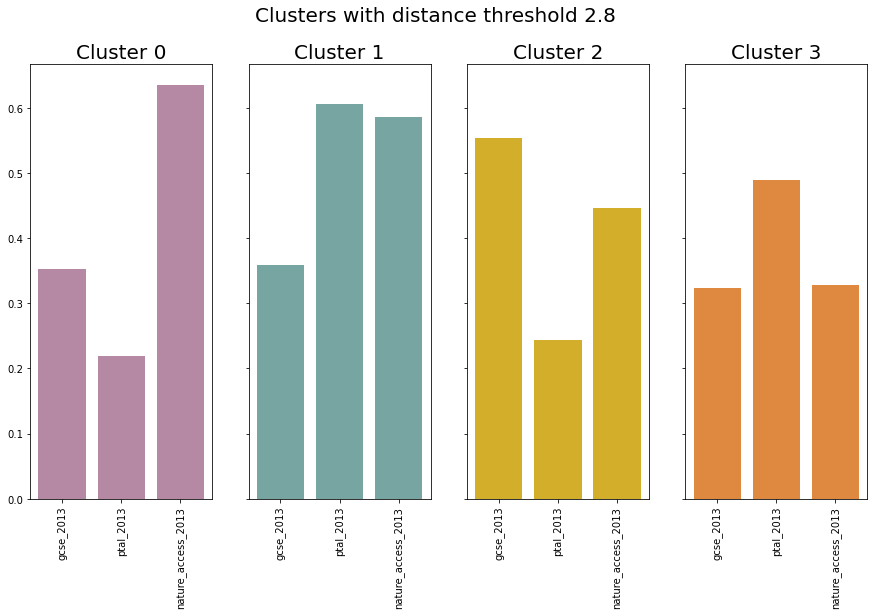

In [140]:
agglom_means =profile_4_profcouple.groupby("no_of_cluster_p4").mean()
agglom_means_T = agglom_means.T.round(4)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T.reset_index(inplace=True)
colors = ['#B588A4','#76A5A2','#D3AE2A','#DE8840']
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
plt.suptitle("Clusters with distance threshold 2.8", fontsize = 20)

In [68]:
#lets map you

#join profile_1_student to orig dataset


profile_4_profcouple_link = df_original_standard_3[["NAME","geometry","gcse_2013", "ptal_2013",  "median_house_2014_log"]]
profile_4_profcouple_link.head()

profile_4_profcouple_link.rename(columns = {'gcse_2013': 'Opportunity_p4', 'ptal_2013': 'Transport_p4','median_house_2014_log' : 'Median_House_p4'}, inplace = True)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [69]:
profile_4_profcouple_link

,NAME,geometry,Opportunity_p4,Transport_p4,Median_House_p4
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.199280
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.221922
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.244721
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830
...,...,...,...,...,...
663,Heath,"POLYGON ((549410.7 187450.7, 549437.7 187422.8...",0.297710,0.208955,0.072275
664,Whalebone,"POLYGON ((547715.2 187914.2, 547845.4 187955.3...",0.358779,0.238806,0.101853
665,Eastbrook,"POLYGON ((549991.5 184928.5, 549988.9 184978.8...",0.389313,0.149254,0.108854
666,Chadwell Heath,"POLYGON ((547715.2 187914.2, 547712.5 187919.1...",0.236641,0.149254,0.109546


In [70]:
#rejoin back 

profile_4_student_Mapping= profile_4_profcouple_link.join(profile_4_profcouple)
profile_4_student_Mapping.head(15)
profile_4_student_Mapping.drop(['geometry'], axis =1)


,NAME,Opportunity_p4,Transport_p4,Median_House_p4,gcse_2013,ptal_2013,nature_access_2013,no_of_cluster_p4
0,Chessington South,0.274809,0.164179,0.199280,0.274809,0.164179,0.935961,0
1,Tolworth and Hook Rise,0.282443,0.149254,0.221922,0.282443,0.149254,0.285714,0
2,Berrylands,0.343511,0.223881,0.244721,0.343511,0.223881,0.475369,0
3,Alexandra,0.465649,0.134328,0.282830,0.465649,0.134328,0.406404,2
4,Alexandra,0.465649,0.134328,0.282830,0.465649,0.134328,0.406404,2
...,...,...,...,...,...,...,...,...
663,Heath,0.297710,0.208955,0.072275,0.297710,0.208955,0.559113,0
664,Whalebone,0.358779,0.238806,0.101853,0.358779,0.238806,0.174877,2
665,Eastbrook,0.389313,0.149254,0.108854,0.389313,0.149254,0.689655,0
666,Chadwell Heath,0.236641,0.149254,0.109546,0.236641,0.149254,0.598522,0


In [71]:
# left join in python
 
cluster_mapping_shape_file_4 = pd.merge(shapefile, profile_4_student_Mapping,
                 left_on = 'NAME',
                 right_on = 'NAME',
                        how = 'left')

print(cluster_mapping_shape_file_4.shape)
print(type(cluster_mapping_shape_file_4))

(787, 16)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [72]:
#cluster_mapping_shape_file.head()
cluster_mapping_shape_file_4.drop(columns=['geometry_y'], inplace= True)
cluster_mapping_shape_file_4.head()


,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry_x,Opportunity_p4,Transport_p4,Median_House_p4,gcse_2013,ptal_2013,nature_access_2013,no_of_cluster_p4
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.274809,0.164179,0.199280,0.274809,0.164179,0.935961,0.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...",0.282443,0.149254,0.221922,0.282443,0.149254,0.285714,0.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...",0.343511,0.223881,0.244721,0.343511,0.223881,0.475369,0.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",0.465649,0.134328,0.282830,0.465649,0.134328,0.406404,2.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",0.465649,0.134328,0.282830,0.465649,0.134328,0.406404,2.0


In [73]:
#select nan values
cluster_mapping_shape_file_4[cluster_mapping_shape_file_4.geometry_x.isna()]

#drop
cluster_mapping_shape_file_4.drop(cluster_mapping_shape_file_4[cluster_mapping_shape_file_4.geometry_x.isna()].index.values, axis=0, inplace=True)

#we can see 24 nan values inside city of london.we will drop 

In [74]:
#rename geom x to geom
cluster_mapping_shape_file_4.rename(columns = {'geometry_x': 'geometry'}, inplace = True)


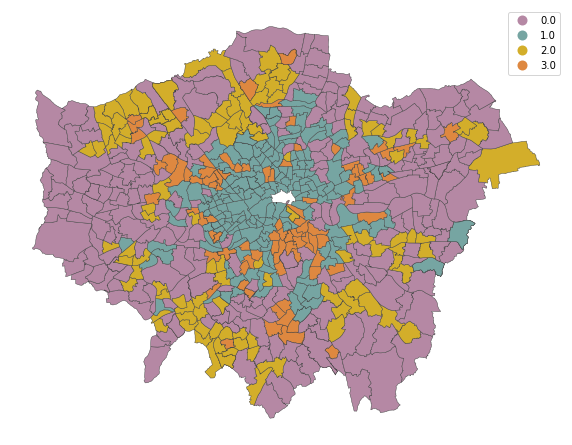

In [145]:


cmap = ListedColormap(['#B588A4','#76A5A2','#D3AE2A','#DE8840'], name='allred')
#GeoSeries(bldgs).plot(cmap=cmap)

#'Pastel1', 'Pastel2', 'Paired', 'Accent'

fig, ax = plt.subplots(figsize = (10,10))
cluster_mapping_shape_file_4.plot(column = "no_of_cluster_p4",edgecolor = '#444545',linewidth =0.45, cmap=cmap,categorical = True, legend=True, ax=ax)
ax.set_axis_off()





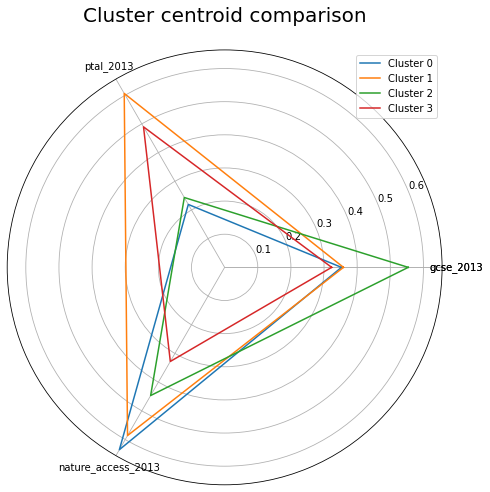

In [76]:
radar_plot_cluster_centroids(agglom_means)

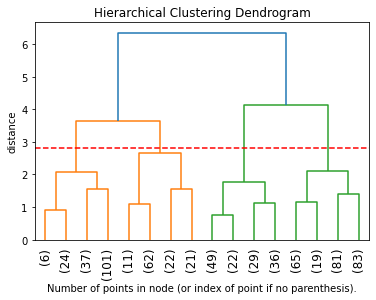

In [77]:
#Profile 5 Cluster

agg_cluster = AgglomerativeClustering(linkage="ward",distance_threshold= 0, n_clusters=None).fit(profile_5_single_income)
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
#plt.hlines(3.5, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.hlines(2.8, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.show()

#conclusion:4 

In [78]:
agg_cluster = AgglomerativeClustering(linkage="ward", distance_threshold = 2.8, n_clusters=None)
agg_cluster.fit(profile_5_single_income)
profile_5_single_income["no_of_cluster_p5"] = agg_cluster.labels_

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [79]:
profile_5_single_income

,ptal_2013,nature_access_2013,median_house_2014_log,no_of_cluster_p5
0,0.164179,0.935961,0.199280,1
1,0.149254,0.285714,0.221922,2
2,0.223881,0.475369,0.244721,1
3,0.134328,0.406404,0.282830,2
4,0.134328,0.406404,0.282830,2
...,...,...,...,...
663,0.208955,0.559113,0.072275,1
664,0.238806,0.174877,0.101853,2
665,0.149254,0.689655,0.108854,1
666,0.149254,0.598522,0.109546,1


/tmp/ipykernel_4742/2612369155.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters with distance threshold 2.8')

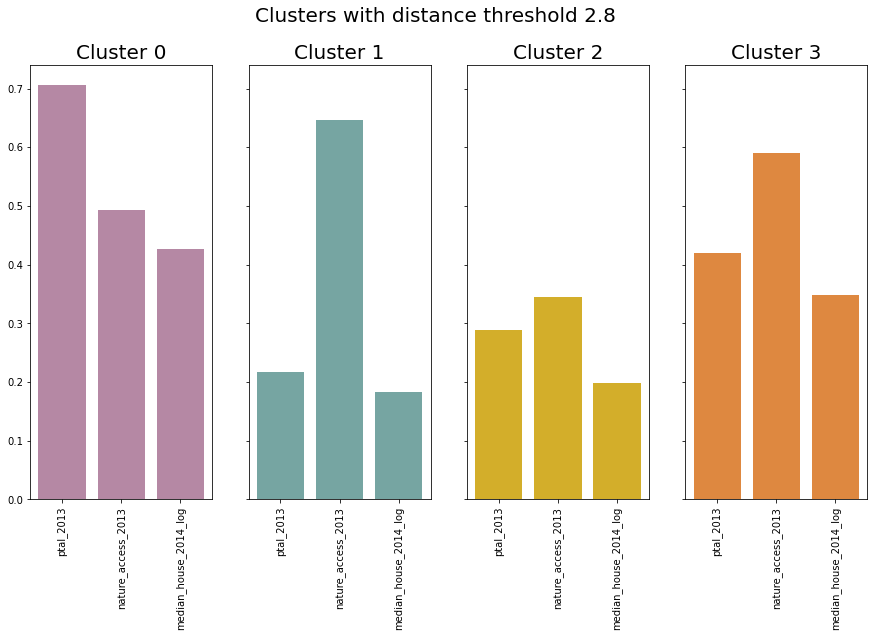

In [141]:
agglom_means =profile_5_single_income.groupby("no_of_cluster_p5").mean()
agglom_means_T = agglom_means.T.round(4)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T.reset_index(inplace=True)
colors = ['#B588A4','#76A5A2','#D3AE2A','#DE8840']
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
plt.suptitle("Clusters with distance threshold 2.8", fontsize = 20)

In [81]:
#lets map you

#join profile_1_student to orig dataset


profile_5_single_income_link = df_original_standard_3[["NAME","geometry","gcse_2013", "ptal_2013",  "median_house_2014_log"]]
profile_5_single_income_link.head()

profile_5_single_income_link.rename(columns = {'gcse_2013': 'Opportunity_p5', 'ptal_2013': 'Transport_p5','median_house_2014_log' : 'Median_House_p5'}, inplace = True)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [82]:
profile_5_single_income_link

,NAME,geometry,Opportunity_p5,Transport_p5,Median_House_p5
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.199280
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.221922
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.244721
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830
...,...,...,...,...,...
663,Heath,"POLYGON ((549410.7 187450.7, 549437.7 187422.8...",0.297710,0.208955,0.072275
664,Whalebone,"POLYGON ((547715.2 187914.2, 547845.4 187955.3...",0.358779,0.238806,0.101853
665,Eastbrook,"POLYGON ((549991.5 184928.5, 549988.9 184978.8...",0.389313,0.149254,0.108854
666,Chadwell Heath,"POLYGON ((547715.2 187914.2, 547712.5 187919.1...",0.236641,0.149254,0.109546


In [83]:
#rejoin back 

profile_5_student_Mapping= profile_5_single_income_link.join(profile_5_single_income)
profile_5_student_Mapping.head(15)
profile_5_student_Mapping.drop(['geometry'], axis =1)


,NAME,Opportunity_p5,Transport_p5,Median_House_p5,ptal_2013,nature_access_2013,median_house_2014_log,no_of_cluster_p5
0,Chessington South,0.274809,0.164179,0.199280,0.164179,0.935961,0.199280,1
1,Tolworth and Hook Rise,0.282443,0.149254,0.221922,0.149254,0.285714,0.221922,2
2,Berrylands,0.343511,0.223881,0.244721,0.223881,0.475369,0.244721,1
3,Alexandra,0.465649,0.134328,0.282830,0.134328,0.406404,0.282830,2
4,Alexandra,0.465649,0.134328,0.282830,0.134328,0.406404,0.282830,2
...,...,...,...,...,...,...,...,...
663,Heath,0.297710,0.208955,0.072275,0.208955,0.559113,0.072275,1
664,Whalebone,0.358779,0.238806,0.101853,0.238806,0.174877,0.101853,2
665,Eastbrook,0.389313,0.149254,0.108854,0.149254,0.689655,0.108854,1
666,Chadwell Heath,0.236641,0.149254,0.109546,0.149254,0.598522,0.109546,1


In [84]:
# left join in python
 
cluster_mapping_shape_file_5 = pd.merge(shapefile, profile_5_student_Mapping,
                 left_on = 'NAME',
                 right_on = 'NAME',
                        how = 'left')

print(cluster_mapping_shape_file_5.shape)
print(type(cluster_mapping_shape_file_5))

(787, 16)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [85]:
#cluster_mapping_shape_file.head()
cluster_mapping_shape_file_5.drop(columns=['geometry_y'], inplace= True)
cluster_mapping_shape_file_5.head()


,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry_x,Opportunity_p5,Transport_p5,Median_House_p5,ptal_2013,nature_access_2013,median_house_2014_log,no_of_cluster_p5
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.274809,0.164179,0.199280,0.164179,0.935961,0.199280,1.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...",0.282443,0.149254,0.221922,0.149254,0.285714,0.221922,2.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...",0.343511,0.223881,0.244721,0.223881,0.475369,0.244721,1.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",0.465649,0.134328,0.282830,0.134328,0.406404,0.282830,2.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",0.465649,0.134328,0.282830,0.134328,0.406404,0.282830,2.0


In [86]:
#select nan values
cluster_mapping_shape_file_5[cluster_mapping_shape_file_5.geometry_x.isna()]

#drop
cluster_mapping_shape_file_5.drop(cluster_mapping_shape_file_5[cluster_mapping_shape_file_5.geometry_x.isna()].index.values, axis=0, inplace=True)

#we can see 24 nan values inside city of london.we will drop 

In [87]:
#rename geom x to geom
cluster_mapping_shape_file_5.rename(columns = {'geometry_x': 'geometry'}, inplace = True)


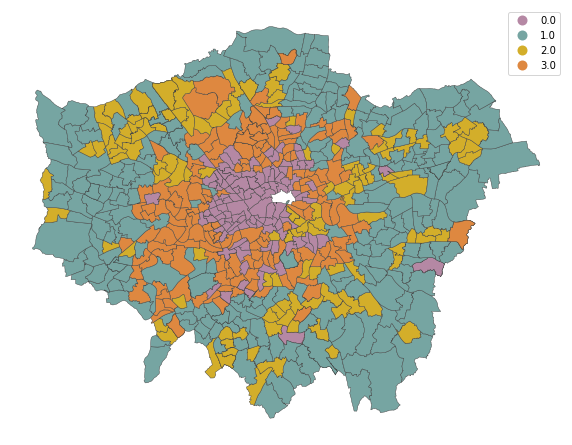

In [146]:


cmap = ListedColormap(['#B588A4','#76A5A2','#D3AE2A','#DE8840'], name='allred')
#GeoSeries(bldgs).plot(cmap=cmap)

#'Pastel1', 'Pastel2', 'Paired', 'Accent'

fig, ax = plt.subplots(figsize = (10,10))
cluster_mapping_shape_file_5.plot(column = "no_of_cluster_p5",edgecolor = '#444545',linewidth =0.45, cmap=cmap,categorical = True, legend=True, ax=ax)
ax.set_axis_off()



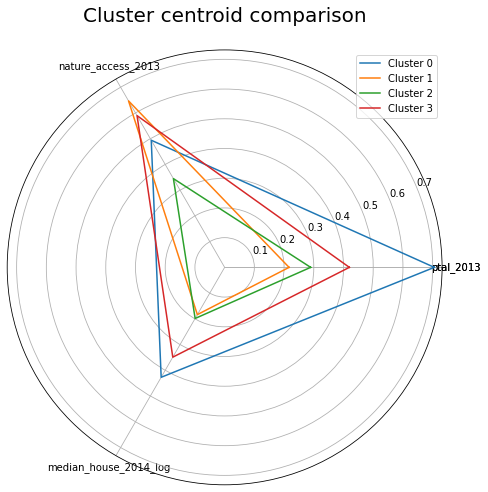

In [89]:
radar_plot_cluster_centroids(agglom_means)

### PROFILE 6

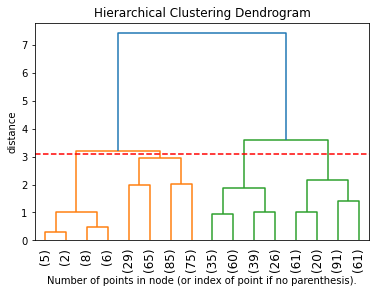

In [90]:
#Profile 6 Cluster

agg_cluster = AgglomerativeClustering(linkage="ward",distance_threshold= 0, n_clusters=None).fit(profile_6_retirees)
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
#plt.hlines(3.5, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.hlines(3.1, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.show()

#conclusion:4 

In [91]:
agg_cluster = AgglomerativeClustering(linkage="ward", distance_threshold = 3.1, n_clusters=None)
agg_cluster.fit(profile_6_retirees)
profile_6_retirees["no_of_cluster_p6"] = agg_cluster.labels_

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [92]:
profile_6_retirees

,ptal_2013,nature_access_2013,pollution_2008,no_of_cluster_p6
0,0.164179,0.935961,0.098507,2
1,0.149254,0.285714,0.226866,1
2,0.223881,0.475369,0.188060,1
3,0.134328,0.406404,0.217910,1
4,0.134328,0.406404,0.200000,1
...,...,...,...,...
663,0.208955,0.559113,0.143284,1
664,0.238806,0.174877,0.188060,1
665,0.149254,0.689655,0.089552,2
666,0.149254,0.598522,0.131343,1


/tmp/ipykernel_4742/345590111.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters with distance threshold 2.8')

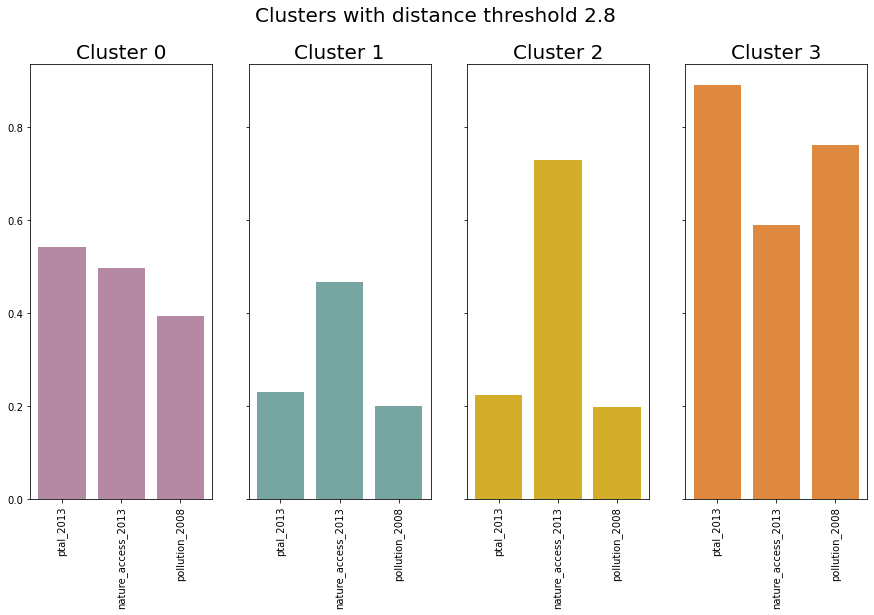

In [142]:
agglom_means =profile_6_retirees.groupby("no_of_cluster_p6").mean()
agglom_means_T = agglom_means.T.round(4)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T.reset_index(inplace=True)
colors = ['#B588A4','#76A5A2','#D3AE2A','#DE8840']
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
plt.suptitle("Clusters with distance threshold 2.8", fontsize = 20)

In [94]:
#lets map you

#join profile_1_student to orig dataset


profile_6_retirees_link = df_original_standard_3[["NAME","geometry","gcse_2013", "ptal_2013",  "median_house_2014_log"]]
profile_6_retirees_link.head()

profile_6_retirees_link.rename(columns = {'gcse_2013': 'Opportunity_p6', 'ptal_2013': 'Transport_p6','median_house_2014_log' : 'Median_House_p6'}, inplace = True)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [95]:
profile_6_retirees_link

,NAME,geometry,Opportunity_p6,Transport_p6,Median_House_p6
0,Chessington South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,0.164179,0.199280
1,Tolworth and Hook Rise,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,0.149254,0.221922
2,Berrylands,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,0.223881,0.244721
3,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830
4,Alexandra,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,0.134328,0.282830
...,...,...,...,...,...
663,Heath,"POLYGON ((549410.7 187450.7, 549437.7 187422.8...",0.297710,0.208955,0.072275
664,Whalebone,"POLYGON ((547715.2 187914.2, 547845.4 187955.3...",0.358779,0.238806,0.101853
665,Eastbrook,"POLYGON ((549991.5 184928.5, 549988.9 184978.8...",0.389313,0.149254,0.108854
666,Chadwell Heath,"POLYGON ((547715.2 187914.2, 547712.5 187919.1...",0.236641,0.149254,0.109546


In [96]:
#rejoin back 

profile_6_retirees_Mapping= profile_6_retirees_link.join(profile_6_retirees)
profile_6_retirees_Mapping.head(15)
profile_6_retirees_Mapping.drop(['geometry'], axis =1)


,NAME,Opportunity_p6,Transport_p6,Median_House_p6,ptal_2013,nature_access_2013,pollution_2008,no_of_cluster_p6
0,Chessington South,0.274809,0.164179,0.199280,0.164179,0.935961,0.098507,2
1,Tolworth and Hook Rise,0.282443,0.149254,0.221922,0.149254,0.285714,0.226866,1
2,Berrylands,0.343511,0.223881,0.244721,0.223881,0.475369,0.188060,1
3,Alexandra,0.465649,0.134328,0.282830,0.134328,0.406404,0.217910,1
4,Alexandra,0.465649,0.134328,0.282830,0.134328,0.406404,0.200000,1
...,...,...,...,...,...,...,...,...
663,Heath,0.297710,0.208955,0.072275,0.208955,0.559113,0.143284,1
664,Whalebone,0.358779,0.238806,0.101853,0.238806,0.174877,0.188060,1
665,Eastbrook,0.389313,0.149254,0.108854,0.149254,0.689655,0.089552,2
666,Chadwell Heath,0.236641,0.149254,0.109546,0.149254,0.598522,0.131343,1


In [97]:
# left join in python
 
cluster_mapping_shape_file_6 = pd.merge(shapefile, profile_6_retirees_Mapping,
                 left_on = 'NAME',
                 right_on = 'NAME',
                        how = 'left')

print(cluster_mapping_shape_file_6.shape)
print(type(cluster_mapping_shape_file_6))

(787, 16)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [98]:
#cluster_mapping_shape_file.head()
cluster_mapping_shape_file_6.drop(columns=['geometry_y'], inplace= True)
cluster_mapping_shape_file_6.head()


,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry_x,Opportunity_p6,Transport_p6,Median_House_p6,ptal_2013,nature_access_2013,pollution_2008,no_of_cluster_p6
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.274809,0.164179,0.199280,0.164179,0.935961,0.098507,2.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...",0.282443,0.149254,0.221922,0.149254,0.285714,0.226866,1.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...",0.343511,0.223881,0.244721,0.223881,0.475369,0.188060,1.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",0.465649,0.134328,0.282830,0.134328,0.406404,0.217910,1.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",0.465649,0.134328,0.282830,0.134328,0.406404,0.200000,1.0


In [99]:
#select nan values
cluster_mapping_shape_file_6[cluster_mapping_shape_file_6.geometry_x.isna()]

#drop
cluster_mapping_shape_file_6.drop(cluster_mapping_shape_file_6[cluster_mapping_shape_file_6.geometry_x.isna()].index.values, axis=0, inplace=True)

#we can see 24 nan values inside city of london.we will drop 

In [100]:
#rename geom x to geom
cluster_mapping_shape_file_6.rename(columns = {'geometry_x': 'geometry'}, inplace = True)


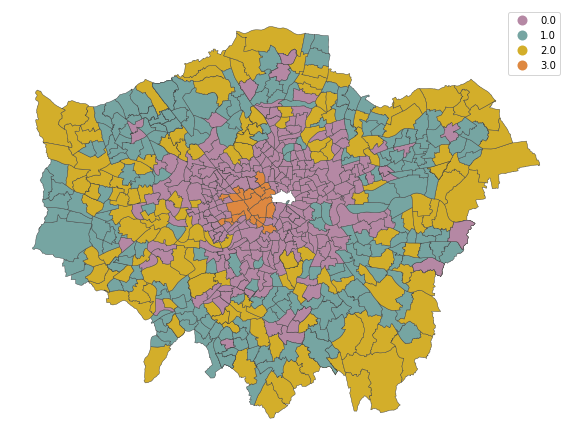

In [147]:
cmap = ListedColormap(['#B588A4','#76A5A2','#D3AE2A','#DE8840'], name='allred')
#GeoSeries(bldgs).plot(cmap=cmap)

#'Pastel1', 'Pastel2', 'Paired', 'Accent'

fig, ax = plt.subplots(figsize = (10,10))
cluster_mapping_shape_file_6.plot(column = "no_of_cluster_p6",edgecolor = '#444545',linewidth =0.45, cmap=cmap,categorical = True, legend=True, ax=ax)
ax.set_axis_off()

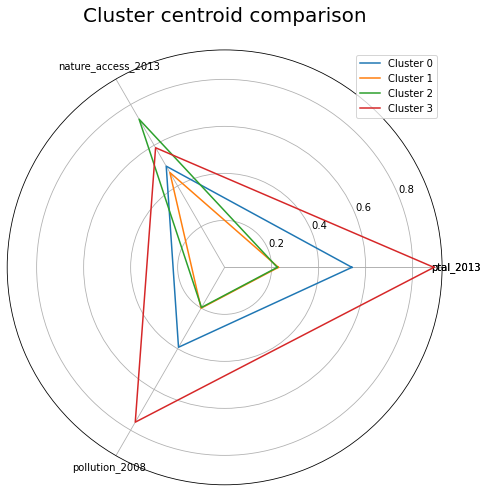

In [102]:
radar_plot_cluster_centroids(agglom_means)

## JOIN DATASETS

In [103]:
## JOIN DATASETS. we want to join the below

# cluster_mapping_shape_file
# cluster_mapping_shape_file_2
# cluster_mapping_shape_file_3
# cluster_mapping_shape_file_4
# cluster_mapping_shape_file_5
# cluster_mapping_shape_file_6


In [129]:
cluster_df = cluster_mapping_shape_file.join(cluster_mapping_shape_file_2['no_of_cluster_p2'])

In [130]:
cluster_df = cluster_df.join(cluster_mapping_shape_file_3['no_of_cluster_p3'])

In [131]:
cluster_df = cluster_df.join(cluster_mapping_shape_file_4['no_of_cluster_p4'])

In [132]:
cluster_df = cluster_df.join(cluster_mapping_shape_file_5['no_of_cluster_p5'])

In [133]:
cluster_df = cluster_df.join(cluster_mapping_shape_file_6['no_of_cluster_p6'])

In [137]:
cluster_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,geometry_y,Opportunity_p1,...,Median_House_p1,gcse_2013,ptal_2013,median_house_2014_log,no_of_cluster_p1,no_of_cluster_p2,no_of_cluster_p3,no_of_cluster_p4,no_of_cluster_p5,no_of_cluster_p6
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...","POLYGON ((516401.6 160201.8, 516407.3 160210.5...",0.274809,...,0.199280,0.274809,0.164179,0.199280,3.0,3.0,3.0,0.0,1.0,2.0
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...","POLYGON ((517829.6 165447.1, 517837.1 165469.4...",0.282443,...,0.221922,0.282443,0.149254,0.221922,3.0,0.0,3.0,0.0,2.0,1.0
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...","POLYGON ((518107.5 167303.4, 518114.3 167307.5...",0.343511,...,0.244721,0.343511,0.223881,0.244721,3.0,3.0,3.0,0.0,1.0,1.0
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,...,0.282830,0.465649,0.134328,0.282830,1.0,3.0,2.0,2.0,2.0,1.0
4,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...","POLYGON ((520480 166909.8, 520490.7 166901.9, ...",0.465649,...,0.282830,0.465649,0.134328,0.282830,1.0,3.0,2.0,2.0,2.0,1.0
